# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [29]:
colors = pd.read_csv('/Users/Rachana 1/Desktop/day-73-pandas-legos/data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [31]:
# Check if every entry in the name column is unique
colors['name'].nunique()

# There are 135 unique colours for LEGO blocks.

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [32]:
# Count distinct values in a column
colors['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [33]:
colors.groupby('is_trans').size()

is_trans
f    107
t     28
dtype: int64

In [34]:
# Group by the is_trans column and count the entries.
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src= 'https://i.imgur.com/aKcwkSx.png'>

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src= 'https://i.imgur.com/whB1olq.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [37]:
sets = pd.read_csv('/Users/Rachana 1/Desktop/day-73-pandas-legos/data/sets.csv')

In [38]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [39]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [75]:
# The first LEGO sets were released in 1949. Names are listed below.

sets.loc[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [86]:
# Alternative solution

sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [57]:
# Lego sold 5 sets in their first year.
sets.groupby('year').count()
# sets.groupby('year').name.nunique()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [87]:
# Alternative solution - filter the dataframe on a condition
# by retrieving the rows where the year column has the value 1949

sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [88]:
sets.num_parts.sort_values()

8878        0
6599        0
6600        0
6601        0
6602        0
         ... 
221      5922
295      5923
10551    6020
11183    7541
15004    9987
Name: num_parts, Length: 15710, dtype: int64

In [85]:
# Top 5 lego sets with max number of parts are listed in the 'name' column
sets.loc[sets['num_parts'] >= 5922]

,set_num,name,year,theme_id,num_parts
221,10189-1,Taj Mahal,2008,673,5922
295,10256-1,Taj Mahal,2017,673,5923
10551,71043-1,Hogwarts Castle,2018,246,6020
11183,75192-1,UCS Millennium Falcon,2017,171,7541
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987


In [89]:
# Alternative solution
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [106]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

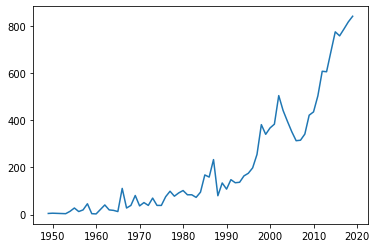

In [142]:
# Use python list slicing to exclude the last two rows of the dataframe
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [143]:
# the .agg() method takes a dictionary as an argument. 
# In this dictionary, specify which operation to apply to each column. 
# To calculate the number of unique entries in the theme_id column,
# use the .nunique() method.

themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [145]:
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace = True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [146]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

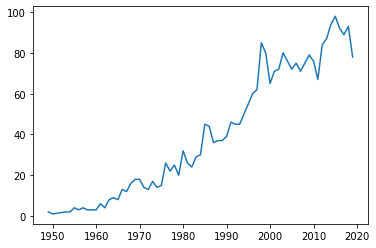

In [148]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

### Line Charts with Two Separate Axes

Text(0, 0.5, 'Number of Themes')

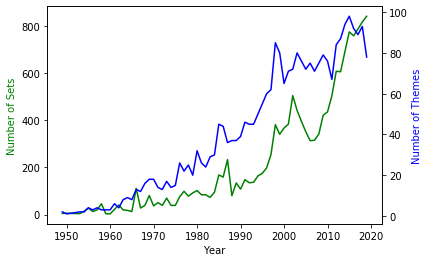

In [152]:
# To plot data on two separate axes on the same chart, 
# get hold of an axis object from Matplotlib.
# Then create another axis object: ax2. 
# Using the .twinx() method allows ax1 and ax2 to share the same x-axis. 

ax1 = plt.gca() # get the axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# Add styling
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [153]:
# Pass a dictionary to the .agg() function to target the 
# num_parts column with the mean() function. 
# This groups the data by year and 
# then averages the number of parts for that year.

parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.rename(columns = {'num_parts': 'average num_parts'}, inplace = True)

In [154]:
parts_per_set.head()

,average num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [155]:
parts_per_set.tail()

,average num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

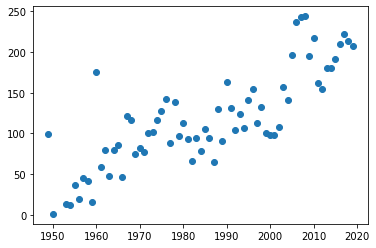

In [159]:
plt.scatter(parts_per_set.index[:-2], parts_per_set['average num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

<img src='https://i.imgur.com/Sg4lcjx.png'>

### Working with a relational database

A relational database organizes data into tables which can be linked—or related—based on data common to each. Joining tables allows you to understand the relationships between the data, or how the tables connect.
[Source]( https://www.ibm.com/cloud/learn/relational-databases)

A database schema is  how the database is organised. Many relational databases, such as our LEGO data, is split into individual tables. We have separate tables for the colours, the sets and the thems. With a relational database, the tables are linked to each other through their keys.

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

So the theme_id is the **foreign key** inside the sets.csv and the id column is the **primary key** inside the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [161]:
themes = pd.read_csv('/Users/Rachana 1/Desktop/day-73-pandas-legos/data/themes.csv')

In [184]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [177]:
star_wars_theme_ids = themes[themes['name'] == 'Star Wars'].id
print(star_wars_theme_ids)

17      18
150    158
174    209
211    261
Name: id, dtype: int64


In [183]:
for theme_id in star_wars_theme_ids:
    print(sets[sets['theme_id'] == theme_id])

       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0
           set_num                                              

### Merging (i.e. Combining) DataFrames based on a Key and creating Bar Charts


In [191]:
# Our theme_ids and number of sets per theme are inside 
# a Series called set_theme_count.

set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

# To make sure there is a column with the name id, 
# convert this Pandas Series into a Pandas DataFrame.
# Provide a dictionary to create the DataFrame. 
# The keys in the dictionary become the column names.

set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


#### The Pandas .merge() function

Use the .merge() method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

To .merge() two DataFrame along a particular column, provide the two DataFrames and the **column name** on which to merge. This is why we set <code>on='id'</code>. Both our <code>set_theme_count</code> and our <code>themes</code> DataFrames have a column with this name.

In [194]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

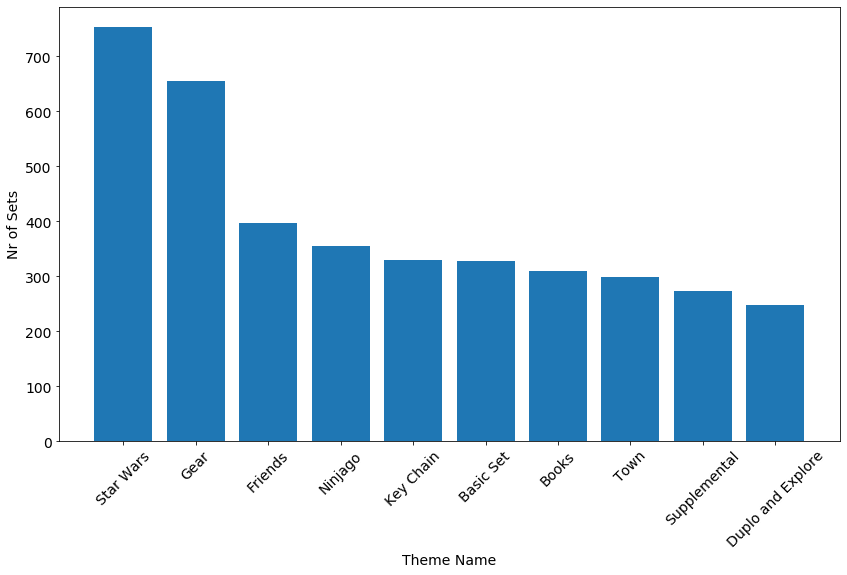

In [195]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45) # Rotate category names to avoid overlap
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])